## <span style="color:Aquamarine">**Exercise**</span>
Using bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

1. Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

2. After removing outliers in step 1, you get a new dataframe.

3. On step(2) dataframe, use 4 standard deviation to remove outliers

4. Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

5. On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"F:\Machine Learning all Algorithms\Feature Engineering\Outlier Detection Z_score\bhp.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [3]:
df[['price_per_sqft']].describe()

,price_per_sqft
count,1.320000e+04
mean,7.920337e+03
std,1.067272e+05
min,2.670000e+02
25%,4.267000e+03
50%,5.438000e+03
75%,7.317000e+03
max,1.200000e+07


**Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score**


**Let's plot Histogram to see how the data is distributed**


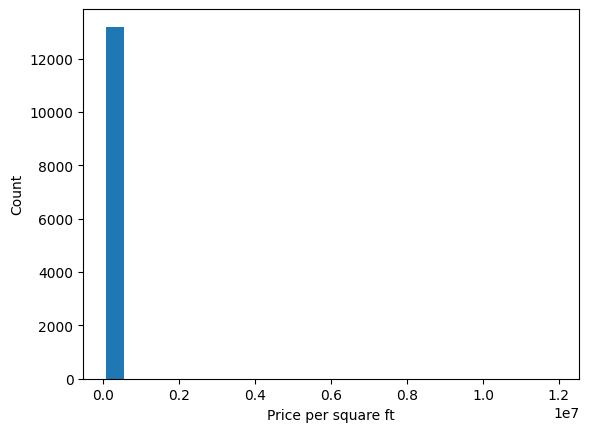

In [4]:

plt.hist(df['price_per_sqft'], bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

### Use log scale to make visuals better

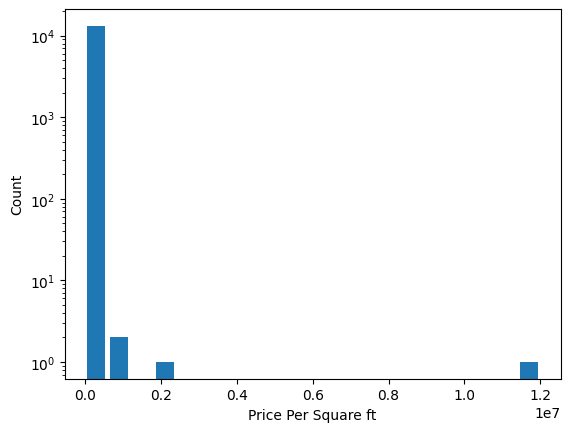

In [5]:
plt.hist(df['price_per_sqft'], bins=20, rwidth=0.8)
plt.xlabel('Price Per Square ft')
plt.ylabel('Count')
plt.yscale('log')

### <span style="color:limegreen">**(1) Outlier detection and removal using percentile [0.001, 0.999]**</span>

In [6]:
min_threshold, max_threshold = df['price_per_sqft'].quantile([0.001, 0.999])
min_threshold, max_threshold

(1366.184, 50959.36200000098)

In [7]:
outliers = df[(df.price_per_sqft < min_threshold) | (df.price_per_sqft > max_threshold)]
outliers.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000


In [8]:
outliers.shape

(28, 7)

In [9]:
# Remove the outliers from the data

df2 = df[(df.price_per_sqft > min_threshold) & (df.price_per_sqft < max_threshold)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


### **We removed 28 Outliers from our dataset**

### <span style="color:limegreen">**(2) Outlier detection and removal using 4 standard deviation**</span>

In [10]:
lower_bound = df2['price_per_sqft'].mean() - 4*df2['price_per_sqft'].std()    #anything below -4 standard deviation from the mean is an outlier
upper_bound = df2['price_per_sqft'].mean() + 4*df2['price_per_sqft'].std()    #anything above +4 standard deviation from the mean is an outlier

lower_bound, upper_bound

(-9900.429065502582, 23227.73653589432)

### **Removing Ouliers beyond 4 Standard Deviations**

In [11]:
df2[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [12]:
std_outliers = df2[(df['price_per_sqft'] > lower_bound) & (df['price_per_sqft'] < upper_bound)]
std_outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [13]:
df2.shape[0]-std_outliers.shape[0]  

125

### **We removed 125 outliers here**

### **Plotting a Histogram along with a bell curve using the cleaned dataset**

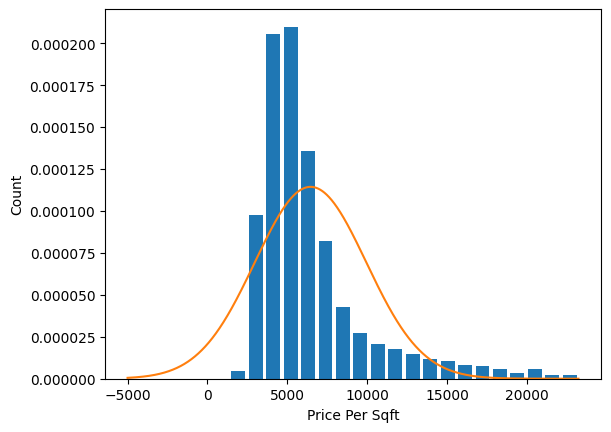

In [14]:
from scipy.stats import norm

plt.hist(std_outliers['price_per_sqft'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Price Per Sqft')
plt.ylabel('Count')

rng = np.arange(-5000, std_outliers['price_per_sqft'].max(), 0.1 )
plt.plot(rng, norm.pdf(rng, std_outliers['price_per_sqft'].mean(), std_outliers['price_per_sqft'].std()))

### <span style="color:limegreen">**(3) Outlier detection and removal using 4 Z-score method**</span>

In [15]:
df2['z_score']=(df2['price_per_sqft'] - df2['price_per_sqft'].mean())/df2['price_per_sqft'].std()
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


In [16]:
df2[(df2['z_score'] < -4) | (df2['z_score'] > 4)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274,7.150495
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333,6.440283
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719,4.118633
760,other,9 Bedroom,600.0,9.0,190.0,9,31666,6.037725
...,...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000,6.842841
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000,9.016218


In [17]:
z_out = df2[(df2['z_score'] > -4) & (df2['z_score'] < 4)]
z_out

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.715923
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,-0.494722
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.569583
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.101099
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.582864
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.006121
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.073973
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.339446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,0.903967


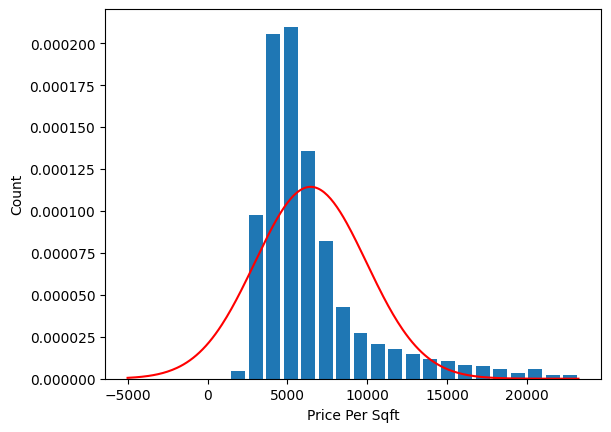

In [36]:
from scipy.stats import norm

plt.hist(std_outliers['price_per_sqft'], bins=20, rwidth=0.8, density=True)
plt.xlabel('Price Per Sqft')
plt.ylabel('Count')

rng = np.arange(-5000, z_out['price_per_sqft'].max(), 100)
plt.plot(rng, norm.pdf(rng, z_out['price_per_sqft'].mean(), z_out['price_per_sqft'].std()), 'red')

### **We got similar output as the standard deviation**